# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

 ==> Restrict GPU memory growth: True


# Start Network runner

In [5]:
DATASET = Dataset.FVC_ICAO
APPROACH = NAS_MTLApproach.APPROACH_2

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS with Approach 2 Fixed',
        'tags': ['nas_approach_2_fixed', 'benchmark', f'{DATASET.value["name"]}', 'mlp_one_shot'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'benchmarking': {
            'use_benchmark_data': False,
            'dataset': DATASET
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': True,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': Dataset.FVC_ICAO.value['tasks'],
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        #'max_blocks_per_branch': 5,
        #'n_child_epochs': N_CHILD_EPOCHS,
        #'controller_epochs': CONTROLLER_EPOCHS,
        #'controller_batch_size': 64,
        #'n_trials': N_TRIALS,

        'controller_sampling_epochs': 2,
        'samples_per_controller_epochs': 3,
        'controller_training_epochs': 5,
        'architecture_training_epochs': 2,
        'controller_loss_alpha': 0.9
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': True
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': True
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 89131
Process ID: 367092
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_use_predictor': True},
 'exp_params': {'description': 'NAS with Approach 2 Fixed',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['nas_approach_2_fixed',
                         'benchmark',
                         'fvc_icao',
                         'mlp_one_shot']},
 'mlp_params': {'max_architecture_length': 5,
                'min_task_group_size': 3,
                'mlp_base_model

# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


In [7]:
runner.train_data.head()

,origin,img_name,mouth,rotation,l_away,eyes_closed,close,hat,dark_glasses,frames_heavy,...,sh_head,blurred,ink_mark,skin_tone,washed_out,pixelation,hair_eyes,background,red_eyes,aligned
0,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
1,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
2,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
3,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False
4,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False


In [11]:
runner.train_data.img_name.values[:2]

array(['/home/guilherme/data1/Dropbox/Link to Desktop/Doutorado/Datasets/icao_dataset/train/FRGC_04288d208.jpg',
       '/home/guilherme/data1/Dropbox/Link to Desktop/Doutorado/Datasets/icao_dataset/train/FRGC_04233d404.jpg'],
      dtype=object)

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!
Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!
Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!
Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!
Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!
Experiencing connection interruptions. Will try to reestablish communication with Neptune. Inte

# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [10]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [11]:
best_archs_list = runner.run_neural_architecture_search_v2()

-------------------- run neural architecture search -------------------
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
------------------------------------------------------------------
                       CONTROLLER EPOCH: 0
------------------------------------------------------------------
GENERATING ARCHITECTURE SAMPLES...
------------------------------------------------------
Sequence: [11, 3, 16, 3, 20]
 .Decoded seq: {'n_denses_2': 1, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [11, 14, 4, 5, 20]
 .Decoded seq: {'n_denses_2': 3, 'n_denses_1': 4, 'n_denses_3': 5, 'n_denses_0': 2}
  ..valid sequence!
Sequence: [2, 4, 15, 14, 20]
 .Decoded seq: {'n_denses_1': 4, 'n_denses_3': 5, 'n_denses_2': 4}
 ..invalid sequence: less than 4 task groups!
Sequence: [6, 18, 3, 18, 20]
 .Decoded seq: {'n_denses_

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss did not improve from 1.67481
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
9/9 [==============================] - 35s 4s/step
Prediction finished!


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


  Task  0: mouth           | EER_mean: 0.18110 | EER_interp: 0.17630 | ACC: 0.82630
  Task  1: rotation        | EER_mean: 0.29270 | EER_interp: 0.29240 | ACC: 0.70750
  Task  2: l_away          | EER_mean: 0.19900 | EER_interp: 0.19650 | ACC: 0.80260
  Task  3: eyes_closed     | EER_mean: 0.08490 | EER_interp: 0.07420 | ACC: 0.93240
  Task  4: close           | EER_mean: 0.41860 | EER_interp: 0.00000 | ACC: 0.01100
  Task  5: hat             | EER_mean: 0.09910 | EER_interp: 0.09800 | ACC: 0.90130
  Task  6: dark_glasses    | EER_mean: 0.03850 | EER_interp: 0.03840 | ACC: 0.96160
  Task  7: frames_heavy    | EER_mean: 0.41040 | EER_interp: 0.00000 | ACC: 0.00550
  Task  8: frame_eyes      | EER_mean: 0.12150 | EER_interp: 0.12000 | ACC: 0.87930
  Task  9: flash_lenses    | EER_mean: 0.15930 | EER_interp: 0.15920 | ACC: 0.84100
  Task 10: veil            | EER_mean: 0.03010 | EER_interp: 0.00000 | ACC: 0.06030
  Task 11: reflection      | EER_mean: 0.22640 | EER_interp: 0.23020 | ACC: 

# Create Model with Best Architecture Found

In [12]:
#best_arch = {'n_denses_0':2,'n_denses_1':2,'n_denses_2':2,'n_denses_3':2}
best_arch = best_archs_list[0]['Decoded architecture']

In [13]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [14]:
%%capture
runner.visualize_model(outfile_path=f"figs/nas/nas_model_{APPROACH.name}.png")

In [15]:
%%capture
runner.model_summary()

# Training Model

In [16]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 4,504,366
  .. Trainable params: 2,246,382
  .. Non-trainable params: 2,257,984
Epoch 1/50
77/77 [==============================] - 422s 5s/step - loss: 0.6198 - background_loss: 0.4581 - close_loss: 0.4637 - ink_mark_loss: 0.4051 - pixelation_loss: 0.2105 - washed_out_loss: 0.0785 - blurred_loss: 0.2594 - sh_head_loss: 0.1086 - mouth_loss: 0.0264 - veil_loss: 0.2789 - red_eyes_loss: 0.3188 - flash_lenses_loss: 0.0838 - dark_glasses_loss: 0.5134 - l_away_loss: 0.2371 - frame_eyes_loss: 0.4606 - hair_eyes_loss: 0.3651 - eyes_closed_loss: 0.2351 - frames_heavy_loss: 0.0465 - sh_face_loss: 0.4867 - skin_tone_loss: 0.0606 - light_loss: 0.2324 - hat_loss: 0.2698 - rotation_loss: 0.3650 - reflection_loss: 0.2339 - background_accuracy: 0.7863 - close_accuracy: 0.7731 - ink_mark_accuracy: 0.8068 - pixelation_accuracy: 0.9160 - washed_out_accuracy: 0.9771 - blu

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
77/77 [==============================] - 386s 5s/step - loss: 0.3902 - background_loss: 0.3067 - close_loss: 0.3990 - ink_mark_loss: 0.2856 - pixelation_loss: 0.0863 - washed_out_loss: 0.0412 - blurred_loss: 0.0662 - sh_head_loss: 0.0204 - mouth_loss: 0.0079 - veil_loss: 0.1743 - red_eyes_loss: 0.1624 - flash_lenses_loss: 0.0094 - dark_glasses_loss: 0.3406 - l_away_loss: 0.1579 - frame_eyes_loss: 0.3612 - hair_eyes_loss: 0.2646 - eyes_closed_loss: 0.1460 - frames_heavy_loss: 3.3812e-05 - sh_face_loss: 0.3742 - skin_tone_loss: 0.0231 - light_loss: 0.1733 - hat_loss: 0.1497 - rotation_loss: 0.2369 - reflection_loss: 0.1148 - background_accuracy: 0.8750 - close_accuracy: 0.8228 - ink_mark_accuracy: 0.8817 - pixelation_accuracy: 0.9702 - washed_out_accuracy: 0.9892 - blurred_accuracy: 0.9783 - sh_head_accuracy: 0.9941 - mouth_accuracy: 0.9972 - veil_accuracy: 0.9284 - red_eyes_accuracy: 0.9359 - flash_lenses_accuracy: 0.9972 - dark_glasses_accuracy: 0.8525 - l_away_accuracy: 0.9

# Plots

-------------------- draw training history -------------------


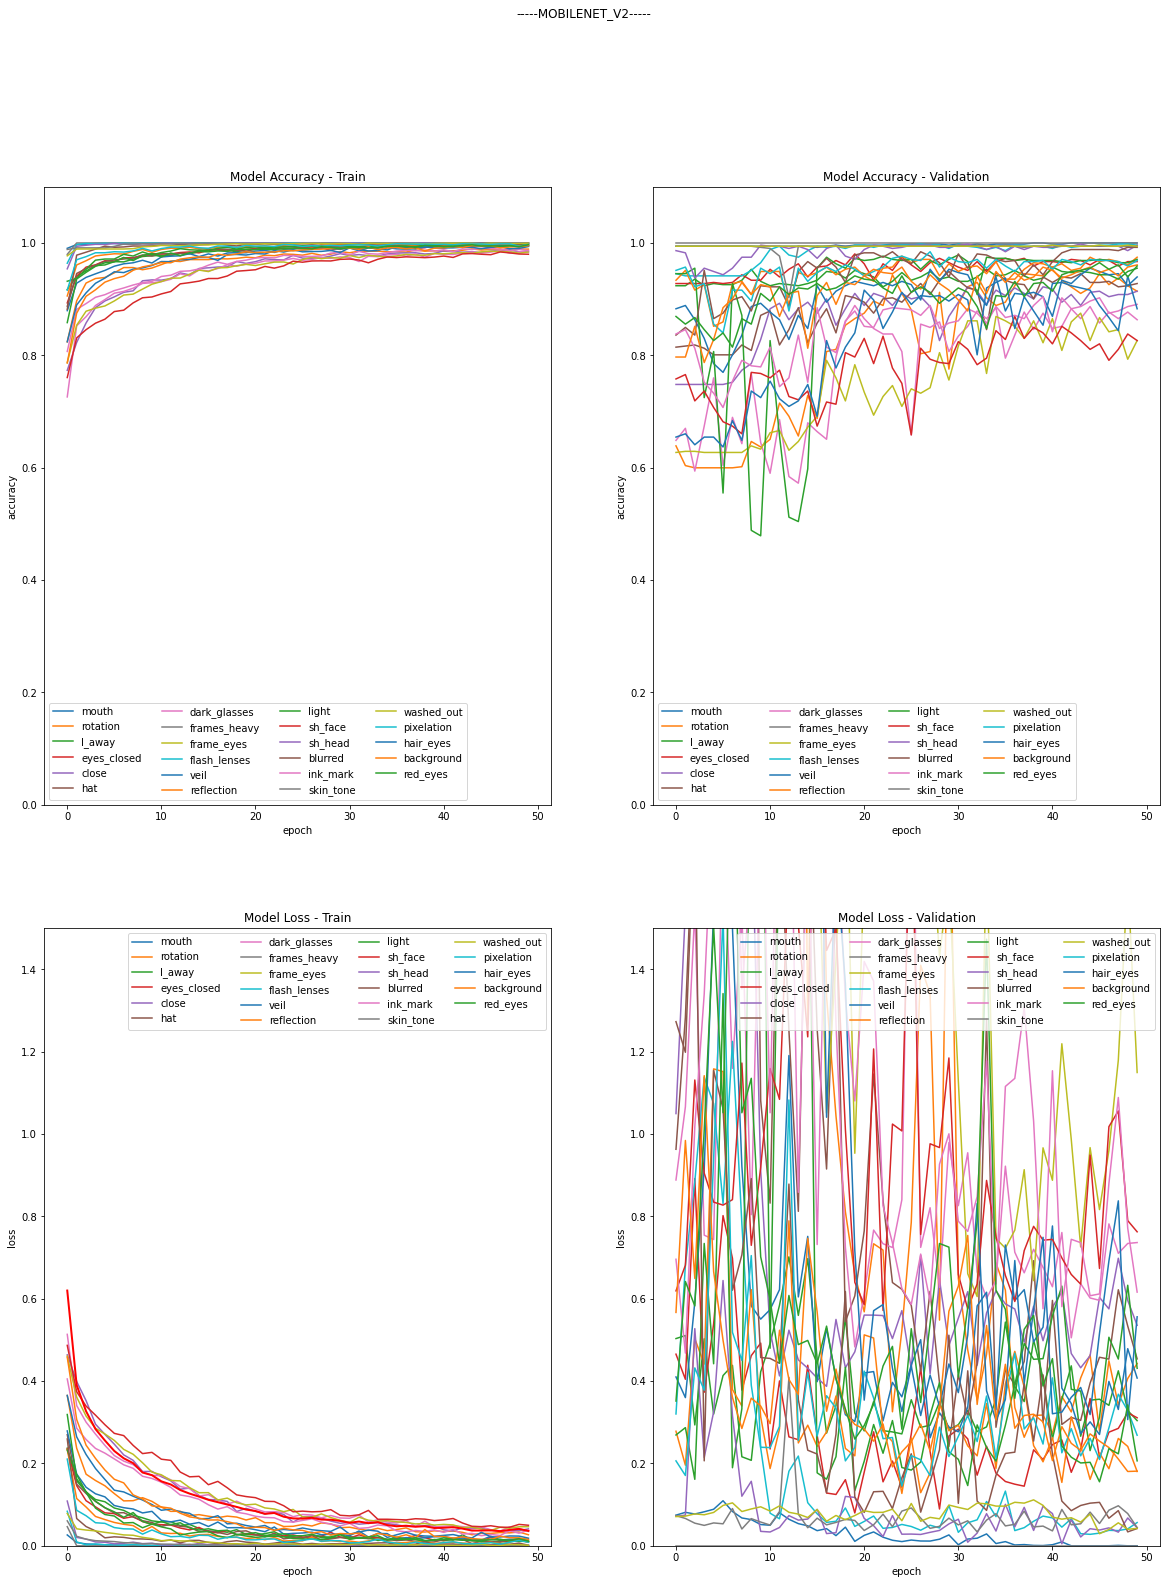

In [17]:
runner.draw_training_history()

# Load Best Model

In [18]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [19]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
9/9 [==============================] - 35s 4s/step
Prediction finished!


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


  Task  0: mouth           | EER_mean: 0.08100 | EER_interp: 0.07600 | ACC: 0.92140
  Task  1: rotation        | EER_mean: 0.11950 | EER_interp: 0.11820 | ACC: 0.88120
  Task  2: l_away          | EER_mean: 0.11520 | EER_interp: 0.11000 | ACC: 0.89210
  Task  3: eyes_closed     | EER_mean: 0.04080 | EER_interp: 0.03920 | ACC: 0.95980
  Task  4: close           | EER_mean: 0.26550 | EER_interp: 0.00000 | ACC: 0.01100
  Task  5: hat             | EER_mean: 0.03230 | EER_interp: 0.04480 | ACC: 0.94700
  Task  6: dark_glasses    | EER_mean: 0.01920 | EER_interp: 0.02170 | ACC: 0.97620
  Task  7: frames_heavy    | EER_mean: 0.00000 | EER_interp: 0.00000 | ACC: 0.99450
  Task  8: frame_eyes      | EER_mean: 0.07590 | EER_interp: 0.07410 | ACC: 0.92500
  Task  9: flash_lenses    | EER_mean: 0.06190 | EER_interp: 0.06200 | ACC: 0.93780
  Task 10: veil            | EER_mean: 0.00390 | EER_interp: 0.00000 | ACC: 0.99630
  Task 11: reflection      | EER_mean: 0.13480 | EER_interp: 0.13350 | ACC: 

## Test Split

In [21]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
1/5 [=====>........................] - ETA: 4s

Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


5/5 [==============================] - 19s 5s/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.12330 | EER_interp: 0.14540 | ACC: 0.84380
  Task  1: rotation        | EER_mean: 0.15870 | EER_interp: 0.16060 | ACC: 0.84030
  Task  2: l_away          | EER_mean: 0.11490 | EER_interp: 0.11220 | ACC: 0.88890
  Task  3: eyes_closed     | EER_mean: 0.05450 | EER_interp: 0.04440 | ACC: 0.96180
  Task  4: close           | EER_mean: 0.52480 | EER_interp: 0.00000 | ACC: 0.00690
  Task  5: hat             | EER_mean: 0.03920 | EER_interp: 0.04490 | ACC: 0.95140
  Task  6: dark_glasses    | EER_mean: 0.03230 | EER_interp: 0.00000 | ACC: 0.99650
  Task  7: frames_heavy    | EER_mean: 0.00000 | EER_interp: 0.00000 | ACC: 0.99310
  Task  8: frame_eyes      | EER_mean: 0.04760 | EER_interp: 0.04580 | ACC: 0.95490
  Task  9: flash_lenses    | EER_mean: 0.05000 | EER_interp: 0.03380 | ACC: 0.97570
  Task 10: veil            | EER_mean: 0.04760 | EER_interp: 0.00000 | ACC: 0.99650
  Ta

# Visualize Model Classification

# Finishing Experiment Manager

In [22]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 285 operations to synchronize with Neptune. Do not kill this process.


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


All 285 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-412
